In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_load = "../../data/"

In [3]:
file_name = "raw/expenses.csv"
full_path = path_load + file_name
data = pd.read_csv(full_path,parse_dates =["date"])
# data['date']  = pd.to_datetime(data['date']) otra opción si no se aplicara parse_dates

In [4]:
data.head()

,id,cost,category,subcategory,created at,date
0,40971,7700,Alimentación,Postres,2023-05-11T17:42:04.198Z,2023-05-11 00:00:00+00:00
1,40956,56892,Vivienda,Internet Hogar (Día 10),2023-05-09T15:14:10.442Z,2023-05-09 00:00:00+00:00
2,40954,136000,"Cultura, diversión y esparcimiento",Deportes,2023-05-07T21:02:58.426Z,2023-05-07 00:00:00+00:00
3,40953,5000,Alimentación,Postres,2023-05-07T19:16:01.343Z,2023-05-07 00:00:00+00:00
4,40952,24000,Alimentación,Comida fuera del hogar,2023-05-07T19:15:34.628Z,2023-05-07 00:00:00+00:00


In [5]:
data.describe()

,id,cost
count,3409.000000,3.409000e+03
mean,25230.797595,2.160079e+04
std,12961.750048,8.478816e+04
min,1734.000000,2.000000e+02
25%,12884.000000,3.350000e+03
50%,26274.000000,5.400000e+03
75%,39614.000000,1.200000e+04
max,40971.000000,2.031520e+06


In [6]:
grouped_date = data.groupby("date")

In [7]:
grouped_date.groups

{2021-07-01 00:00:00+00:00: [3407, 3408], 2021-07-13 00:00:00+00:00: [3406], 2021-07-16 00:00:00+00:00: [3405], 2021-07-17 00:00:00+00:00: [3402, 3403, 3404], 2021-07-19 00:00:00+00:00: [3401], 2021-07-20 00:00:00+00:00: [3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3400], 2021-07-22 00:00:00+00:00: [3388], 2021-07-23 00:00:00+00:00: [3387], 2021-07-30 00:00:00+00:00: [3384, 3385, 3386], 2021-07-31 00:00:00+00:00: [3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3383], 2021-08-01 00:00:00+00:00: [3367, 3368, 3369, 3370, 3371, 3372, 3373], 2021-08-02 00:00:00+00:00: [3364, 3365, 3366], 2021-08-03 00:00:00+00:00: [3361, 3362, 3363], 2021-08-04 00:00:00+00:00: [3358, 3359, 3360], 2021-08-05 00:00:00+00:00: [3352, 3353, 3354, 3355, 3356, 3357], 2021-08-06 00:00:00+00:00: [3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351], 2021-08-07 00:00:00+00:00: [3338, 3339, 3340, 3341], 2021-08-08 00:00:00+00:00: [3328, 3329, 3330, 3331, 3332, 3333, 3334, 3335, 3336

In [8]:
data.dtypes

id                           int64
cost                         int64
category                    object
subcategory                 object
created at                  object
date           datetime64[ns, UTC]
dtype: object

# Muestrar por mes

In [9]:
resample_date = data.resample('1M', on='date').cost.sum()
resample_date

date
2021-07-31 00:00:00+00:00    1854810
2021-08-31 00:00:00+00:00    2949470
2021-09-30 00:00:00+00:00    2449092
2021-10-31 00:00:00+00:00    3269372
2021-11-30 00:00:00+00:00    3143335
2021-12-31 00:00:00+00:00    4119692
2022-01-31 00:00:00+00:00    3121610
2022-02-28 00:00:00+00:00    2049788
2022-03-31 00:00:00+00:00    2947435
2022-04-30 00:00:00+00:00    2756124
2022-05-31 00:00:00+00:00    3475179
2022-06-30 00:00:00+00:00    4345208
2022-07-31 00:00:00+00:00    3511116
2022-08-31 00:00:00+00:00    3591612
2022-09-30 00:00:00+00:00    4082624
2022-10-31 00:00:00+00:00    5296946
2022-11-30 00:00:00+00:00    4466767
2022-12-31 00:00:00+00:00    2901875
2023-01-31 00:00:00+00:00    2962677
2023-02-28 00:00:00+00:00    2505194
2023-03-31 00:00:00+00:00    2882122
2023-04-30 00:00:00+00:00    3183723
2023-05-31 00:00:00+00:00    1771318
Freq: M, Name: cost, dtype: int64

In [10]:
x = resample_date.index
y = resample_date.values

In [11]:
print('Promedio gastos mensual:', y.mean())

Promedio gastos mensual: 3201612.565217391


In [12]:
x

DatetimeIndex(['2021-07-31 00:00:00+00:00', '2021-08-31 00:00:00+00:00',
               '2021-09-30 00:00:00+00:00', '2021-10-31 00:00:00+00:00',
               '2021-11-30 00:00:00+00:00', '2021-12-31 00:00:00+00:00',
               '2022-01-31 00:00:00+00:00', '2022-02-28 00:00:00+00:00',
               '2022-03-31 00:00:00+00:00', '2022-04-30 00:00:00+00:00',
               '2022-05-31 00:00:00+00:00', '2022-06-30 00:00:00+00:00',
               '2022-07-31 00:00:00+00:00', '2022-08-31 00:00:00+00:00',
               '2022-09-30 00:00:00+00:00', '2022-10-31 00:00:00+00:00',
               '2022-11-30 00:00:00+00:00', '2022-12-31 00:00:00+00:00',
               '2023-01-31 00:00:00+00:00', '2023-02-28 00:00:00+00:00',
               '2023-03-31 00:00:00+00:00', '2023-04-30 00:00:00+00:00',
               '2023-05-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', freq='M')

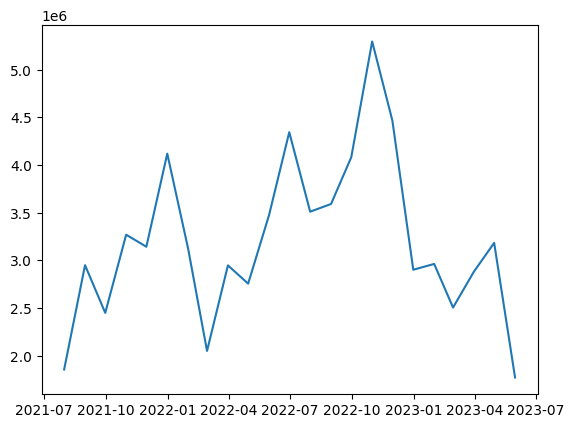

In [13]:
#plt.plot(kind="scatter", x=x, y=y)
plt.plot(x, y)

# Agregando diás festivos al datasets

In [14]:
from datetime import date
import holidays

In [15]:
co_holidays = holidays.CO()

In [16]:
a = holidays.CO(years = 2022)
a[2].index

<function str.index>

In [17]:
# count holidays in a month
def count_holidays_in_month(x):
    print(x)
    year= x.year
    myMonth =  x.month
    cant_holidays = 0
    for ptr in holidays.CO(years = year).items():
        if ptr[0].month == myMonth:
            cant_holidays+= 1
    return cant_holidays

In [18]:
df=pd.DataFrame()

In [19]:
df['costs'] = resample_date.values

In [20]:
df.index = resample_date.index
df.head()

,costs
date,
2021-07-31 00:00:00+00:00,1854810
2021-08-31 00:00:00+00:00,2949470
2021-09-30 00:00:00+00:00,2449092
2021-10-31 00:00:00+00:00,3269372
2021-11-30 00:00:00+00:00,3143335


In [21]:
df['holidays'] = df.index.to_series().apply(count_holidays_in_month)

DatetimeIndex(['2021-07-31 00:00:00+00:00', '2021-08-31 00:00:00+00:00',
               '2021-09-30 00:00:00+00:00', '2021-10-31 00:00:00+00:00',
               '2021-11-30 00:00:00+00:00', '2021-12-31 00:00:00+00:00',
               '2022-01-31 00:00:00+00:00', '2022-02-28 00:00:00+00:00',
               '2022-03-31 00:00:00+00:00', '2022-04-30 00:00:00+00:00',
               '2022-05-31 00:00:00+00:00', '2022-06-30 00:00:00+00:00',
               '2022-07-31 00:00:00+00:00', '2022-08-31 00:00:00+00:00',
               '2022-09-30 00:00:00+00:00', '2022-10-31 00:00:00+00:00',
               '2022-11-30 00:00:00+00:00', '2022-12-31 00:00:00+00:00',
               '2023-01-31 00:00:00+00:00', '2023-02-28 00:00:00+00:00',
               '2023-03-31 00:00:00+00:00', '2023-04-30 00:00:00+00:00',
               '2023-05-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)
2021-07-31 00:00:00+00:00
2021-08-31 00:00:00+00:00
2021-09-30 00:00:00+00:00
2021-10-31 00:00:00+

In [22]:
df.head()

,costs,holidays
date,,
2021-07-31 00:00:00+00:00,1854810,2
2021-08-31 00:00:00+00:00,2949470,2
2021-09-30 00:00:00+00:00,2449092,0
2021-10-31 00:00:00+00:00,3269372,1
2021-11-30 00:00:00+00:00,3143335,2


In [23]:
# Crear el datasets
directory = path_load + 'processed'
file_df_name = '/summaryCosts.csv'
df.to_csv(directory+file_df_name,index=False)